In [63]:
# import os

# filepath = 'crawl_data_thptqg_2022.csv'

# if os.path.exists(filepath):
#     with open(filepath, 'r') as file:
#         # Tiếp tục xử lý file tại đây
#         pass
# else:
#     print("File not found:", filepath)

# Crawl dữ liệu từ web

 Số báo danh là một dãy số gồm 2 phần, 2 chữ số đầu là mã Hội đồng thi, và 6 chữ số tiếp theo chỉ số thứ tự của thí sinh trong Hội đồng thi đó. Ở đây 02 là hội đồng thi TPHCM

In [64]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Đường dẫn và tên tệp tin CSV
filepath = 'crawl_data_thptqg_2022.csv'
# Tạo DataFrame rỗng nếu chưa tồn tại tệp tin hoặc tệp tin rỗng
df = pd.DataFrame()
df.to_csv(filepath, index=False)
years = ['2022']

# Chuyển số '02000001' thành chuỗi
start_idx = int('02000001')

def crawl_data(url):
    try:
        # Truy cập trang web
        page = requests.get(url)
        print("{}, code: {}".format(url, page.status_code))

        # Kiểm tra trạng thái trang web
        if page.status_code == 404:
            print("[INFO] {}: no data".format(url))
            return None

        print("[GET] {}".format(url))

        # Phân tích mã HTML
        soup = BeautifulSoup(page.text, "html.parser")

        # Trích xuất thông tin điểm thi
        sub_elements = soup.find_all("td")
        sub_elements = [sub_elements[i:i+2] for i in range(0, len(sub_elements), 2)]

        # Tạo danh sách thông tin điểm thi
        subjects = {
            'SBD': soup.find_all("p", {"class": "font-bold"})[0].text,
            'Sở GD': soup.find_all("p", {"class": "edu-institution"})[0].text,
            'Toán': '',
            'Văn': '',
            'Sử': '',
            'Địa': '',
            'Lí': '',
            'Hoá': '',
            'Sinh': '',
            'Ngoại ngữ': '',
            'GDCD': '',
            'Năm thi': year
        }
        for element in sub_elements:
            for key, value in subjects.items():
                if element[0].text == key:
                    subjects[key] = element[1].text

        return subjects

    except Exception as e:
        print(f"[ERROR] {str(e)}")
        return None

count = 0  # Biến đếm số lượng dữ liệu đã crawl
for year in years:
    idx = start_idx
    while True:
        # Tạo đường dẫn trang web
        idx_str = str(idx).zfill(8)  # Giữ số 0 ở đầu
        url = "https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/{}/{}.html".format(year, idx_str)

        # Crawl dữ liệu từ trang web
        data = crawl_data(url)

        if data:
            # Tạo DataFrame mới từ dữ liệu thu được
            df_subjects = pd.DataFrame([data])

            # Ghép DataFrame mới vào DataFrame hiện có
            df = pd.concat([df, df_subjects], ignore_index=True)
            print("[INFO] Crawled data for URL: {}".format(url))
            print(data)

            # Tăng biến đếm lên 1
            count += 1

            # Lưu DataFrame vào tệp tin CSV sau mỗi lần crawl thành công
            try:
                df.to_csv(filepath, index=False, header=True)
                print("[INFO] Appended data for year {}".format(year))
            except Exception as e:
                print(f"[ERROR] {str(e)}")

        idx += 1

        # Kiểm tra điều kiện dừng
        if count >= 1000:  # Dừng khi đã crawl đủ 1000 dữ liệu
            break


https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000001.html, code: 200
[GET] https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000001.html
[INFO] Crawled data for URL: https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000001.html
{'SBD': '02000001', 'Sở GD': 'Sở GD&ĐT Thành Phố Hồ Chí Minh', 'Toán': '7.4', 'Văn': '7.25', 'Sử': '', 'Địa': '', 'Lí': '7.75', 'Hoá': '', 'Sinh': '5.5', 'Ngoại ngữ': '9.8', 'GDCD': '', 'Năm thi': '2022'}
[INFO] Appended data for year 2022
https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000002.html, code: 200
[GET] https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000002.html
[INFO] Crawled data for URL: https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2022/02000002.html
{'SBD': '02000002', 'Sở GD': 'Sở GD&ĐT Thành Phố Hồ Chí Minh', 'Toán': '8.4', 'Văn': '7.5', 'Sử': '', 'Địa': '', 'Lí

In [88]:
df = pd.read_csv(filepath)
df.head(10)

,SBD,Sở GD,Toán,Văn,Sử,Địa,Lí,Hoá,Sinh,Ngoại ngữ,GDCD,Năm thi
0,2000001,Sở GD&ĐT Thành Phố Hồ Chí Minh,7.4,7.25,NaN,NaN,7.75,NaN,5.50,9.8,NaN,2022
1,2000002,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.4,7.50,NaN,NaN,7.50,NaN,4.50,9.4,NaN,2022
2,2000003,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.4,6.50,NaN,NaN,6.50,NaN,4.50,4.2,NaN,2022
3,2000004,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.8,5.50,NaN,NaN,8.25,NaN,6.00,8.8,NaN,2022
4,2000005,Sở GD&ĐT Thành Phố Hồ Chí Minh,7.2,7.25,6.00,4.5,NaN,NaN,NaN,9.4,7.50,2022
5,2000006,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.2,6.50,NaN,NaN,7.00,NaN,3.75,8.6,NaN,2022
6,2000007,Sở GD&ĐT Thành Phố Hồ Chí Minh,7.2,7.25,NaN,NaN,7.00,NaN,3.00,5.4,NaN,2022
7,2000008,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.0,7.75,NaN,NaN,8.50,NaN,4.25,7.4,NaN,2022
8,2000009,Sở GD&ĐT Thành Phố Hồ Chí Minh,7.6,7.25,8.25,7.5,NaN,NaN,NaN,7.8,8.25,2022
9,2000010,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.4,7.00,NaN,NaN,6.25,NaN,4.25,7.2,NaN,2022


In [89]:
monthi = ['Toán', 'Văn', 'Ngoại ngữ', 'Lí', 'Hoá', 'Sinh', 'Sử', 'Địa', 'GDCD']

In [90]:
df['Tổng môn thi'] = df[monthi].notna().sum(axis=1).tolist()
df.head(10)

,SBD,Sở GD,Toán,Văn,Sử,Địa,Lí,Hoá,Sinh,Ngoại ngữ,GDCD,Năm thi,Tổng môn thi
0,2000001,Sở GD&ĐT Thành Phố Hồ Chí Minh,7.4,7.25,NaN,NaN,7.75,NaN,5.50,9.8,NaN,2022,5
1,2000002,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.4,7.50,NaN,NaN,7.50,NaN,4.50,9.4,NaN,2022,5
2,2000003,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.4,6.50,NaN,NaN,6.50,NaN,4.50,4.2,NaN,2022,5
3,2000004,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.8,5.50,NaN,NaN,8.25,NaN,6.00,8.8,NaN,2022,5
4,2000005,Sở GD&ĐT Thành Phố Hồ Chí Minh,7.2,7.25,6.00,4.5,NaN,NaN,NaN,9.4,7.50,2022,6
5,2000006,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.2,6.50,NaN,NaN,7.00,NaN,3.75,8.6,NaN,2022,5
6,2000007,Sở GD&ĐT Thành Phố Hồ Chí Minh,7.2,7.25,NaN,NaN,7.00,NaN,3.00,5.4,NaN,2022,5
7,2000008,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.0,7.75,NaN,NaN,8.50,NaN,4.25,7.4,NaN,2022,5
8,2000009,Sở GD&ĐT Thành Phố Hồ Chí Minh,7.6,7.25,8.25,7.5,NaN,NaN,NaN,7.8,8.25,2022,6
9,2000010,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.4,7.00,NaN,NaN,6.25,NaN,4.25,7.2,NaN,2022,5


# Xào nấu dữ liệu vừa crawl về - Clean data

- Check missing values

- Thay các giá trị NaN bằng -1 (biểu thị thí sinh không thi môn đó)

In [79]:
diemthi = df.fillna(-1)
diemthi.head(10)

,SBD,Sở GD,Toán,Văn,Sử,Địa,Lí,Hoá,Sinh,Ngoại ngữ,GDCD,Năm thi,Tổng môn thi
0,2000001,Sở GD&ĐT Thành Phố Hồ Chí Minh,7.4,7.25,-1.00,-1.0,7.75,-1.0,5.50,9.8,-1.00,2022,5
1,2000002,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.4,7.50,-1.00,-1.0,7.50,-1.0,4.50,9.4,-1.00,2022,5
2,2000003,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.4,6.50,-1.00,-1.0,6.50,-1.0,4.50,4.2,-1.00,2022,5
3,2000004,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.8,5.50,-1.00,-1.0,8.25,-1.0,6.00,8.8,-1.00,2022,5
4,2000005,Sở GD&ĐT Thành Phố Hồ Chí Minh,7.2,7.25,6.00,4.5,-1.00,-1.0,-1.00,9.4,7.50,2022,6
5,2000006,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.2,6.50,-1.00,-1.0,7.00,-1.0,3.75,8.6,-1.00,2022,5
6,2000007,Sở GD&ĐT Thành Phố Hồ Chí Minh,7.2,7.25,-1.00,-1.0,7.00,-1.0,3.00,5.4,-1.00,2022,5
7,2000008,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.0,7.75,-1.00,-1.0,8.50,-1.0,4.25,7.4,-1.00,2022,5
8,2000009,Sở GD&ĐT Thành Phố Hồ Chí Minh,7.6,7.25,8.25,7.5,-1.00,-1.0,-1.00,7.8,8.25,2022,6
9,2000010,Sở GD&ĐT Thành Phố Hồ Chí Minh,8.4,7.00,-1.00,-1.0,6.25,-1.0,4.25,7.2,-1.00,2022,5


## Chia khối Tự nhiên và Xã hội

In [82]:
thi_sinh_co_diem_0 = diemthi.loc[(diemthi == 0).any(axis=1)]

if len(thi_sinh_co_diem_0) > 0:
    print(thi_sinh_co_diem_0)
else:
    print("Không có thí sinh nào")


Không có thí sinh nào


In [87]:
# Chuyển đổi các cột dữ liệu sang kiểu số
diemthi[monthi] = diemthi[monthi].apply(pd.to_numeric, errors='coerce')

# Tìm môn thi thấp nhất
mon_thi_thap_nhat = diemthi.loc[:, 'Toán':'Ngoại ngữ'].min().idxmin()

if mon_thi_thap_nhat:
    print("Môn thi có điểm thấp nhất là:", mon_thi_thap_nhat)
    diem_thap_nhat = diemthi.loc[diemthi[mon_thi_thap_nhat].idxmin(), monthi]
    print("Điểm:", diem_thap_nhat)

else:
    print("Không có môn thi nào có điểm.")


Môn thi có điểm thấp nhất là: Sử
Điểm: Toán          7.4
Văn          7.25
Ngoại ngữ     9.8
Lí           7.75
Hoá          -1.0
Sinh          5.5
Sử           -1.0
Địa          -1.0
GDCD         -1.0
Name: 0, dtype: object


In [67]:
thi_toan = diemthi[diemthi['Toán'] >= 0].count()['Toán']
thi_van = diemthi[diemthi['Văn'] >= 0].count()['Văn']
thi_nn = diemthi[diemthi['Ngoại ngữ'] >= 0].count()['Ngoại ngữ']

thi_ly = diemthi[diemthi['Lí'] >= 0].count()['Lí']
thi_hoa = diemthi[diemthi['Hoá'] >= 0].count()['Hoá']
thi_sinh = diemthi[diemthi['Sinh'] >= 0].count()['Sinh']

thi_su = diemthi[diemthi['Sử'] >= 0].count()['Sử']
thi_dia = diemthi[diemthi['Địa'] >= 0].count()['Địa']
thi_gdcd = diemthi[diemthi['GDCD'] >= 0].count()['GDCD']


In [68]:
tong_thi_sinh = diemthi.count()['SBD']

In [69]:
no_of_stu = [thi_toan, thi_van, thi_nn, thi_ly, thi_hoa, thi_sinh, thi_su, thi_dia, thi_gdcd]
ptram_thi = no_of_stu / tong_thi_sinh

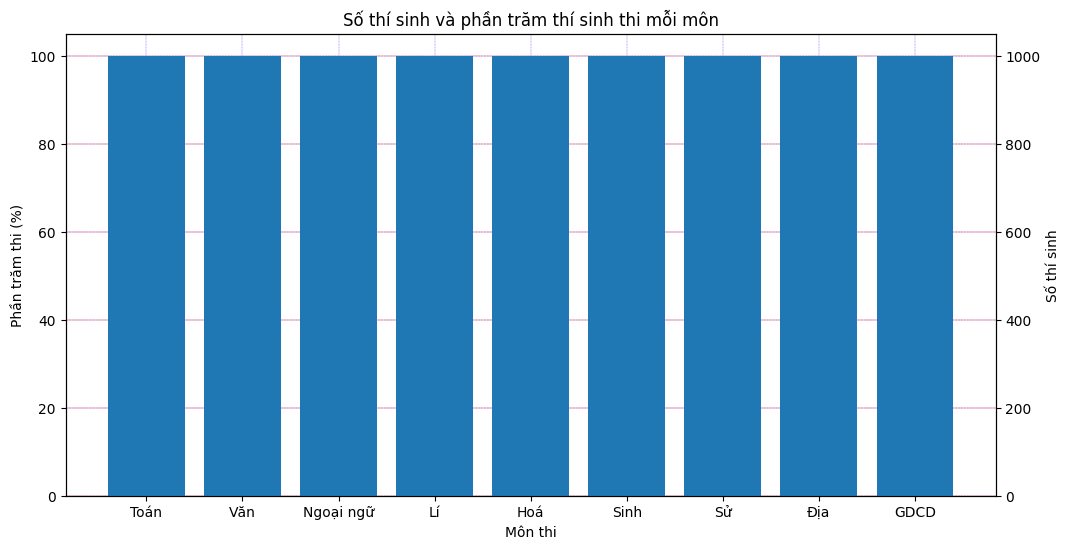

In [70]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)

ax1.bar(subjects, ptram_thi * 100)
ax1.set_xlabel('Môn thi')
ax1.set_ylabel('Phần trăm thi (%)')
ax1.grid(color='b', ls='-.', lw = 0.2)
ax1.set_axisbelow(True)

# Biểu diễn chung 1 đồ thị
ax2 = ax1.twinx()

ax2.bar(subjects, no_of_stu)
ax2.set_ylabel('Số thí sinh')
ax2.grid(color='r', ls='-', lw = 0.2)
ax2.set_axisbelow(True)

plt.title('Số thí sinh và phần trăm thí sinh thi mỗi môn')
plt.show()